<a href="https://colab.research.google.com/github/RuthKassahun/ML-with-Scikit/blob/main/breast_cancer_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt 
import pandas as pd
import numpy as np
import seaborn as sns


>Load our data

In [7]:
breast_dataset = load_breast_cancer()


>Display the description of dataset

In [8]:
print(breast_dataset.DESCR+"\n\n")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

>Display the size of the dataset


In [9]:
print(breast_dataset.data.shape)

(569, 30)


>Display feature names

In [10]:
print(str(breast_dataset.feature_names)+"\n")

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



> Display class (target) names

In [11]:
print(breast_dataset.target_names)

['malignant' 'benign']


>Convert the dataset into panda dataframe

In [12]:
breast_dataset_pd = pd.DataFrame(breast_dataset.data, columns= breast_dataset.feature_names)
breast_dataset_pd['target'] = breast_dataset.target

>To better visualize the data, let's use a scatter plot 

In [13]:
import sys

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa95803890>,
      dtype=object)

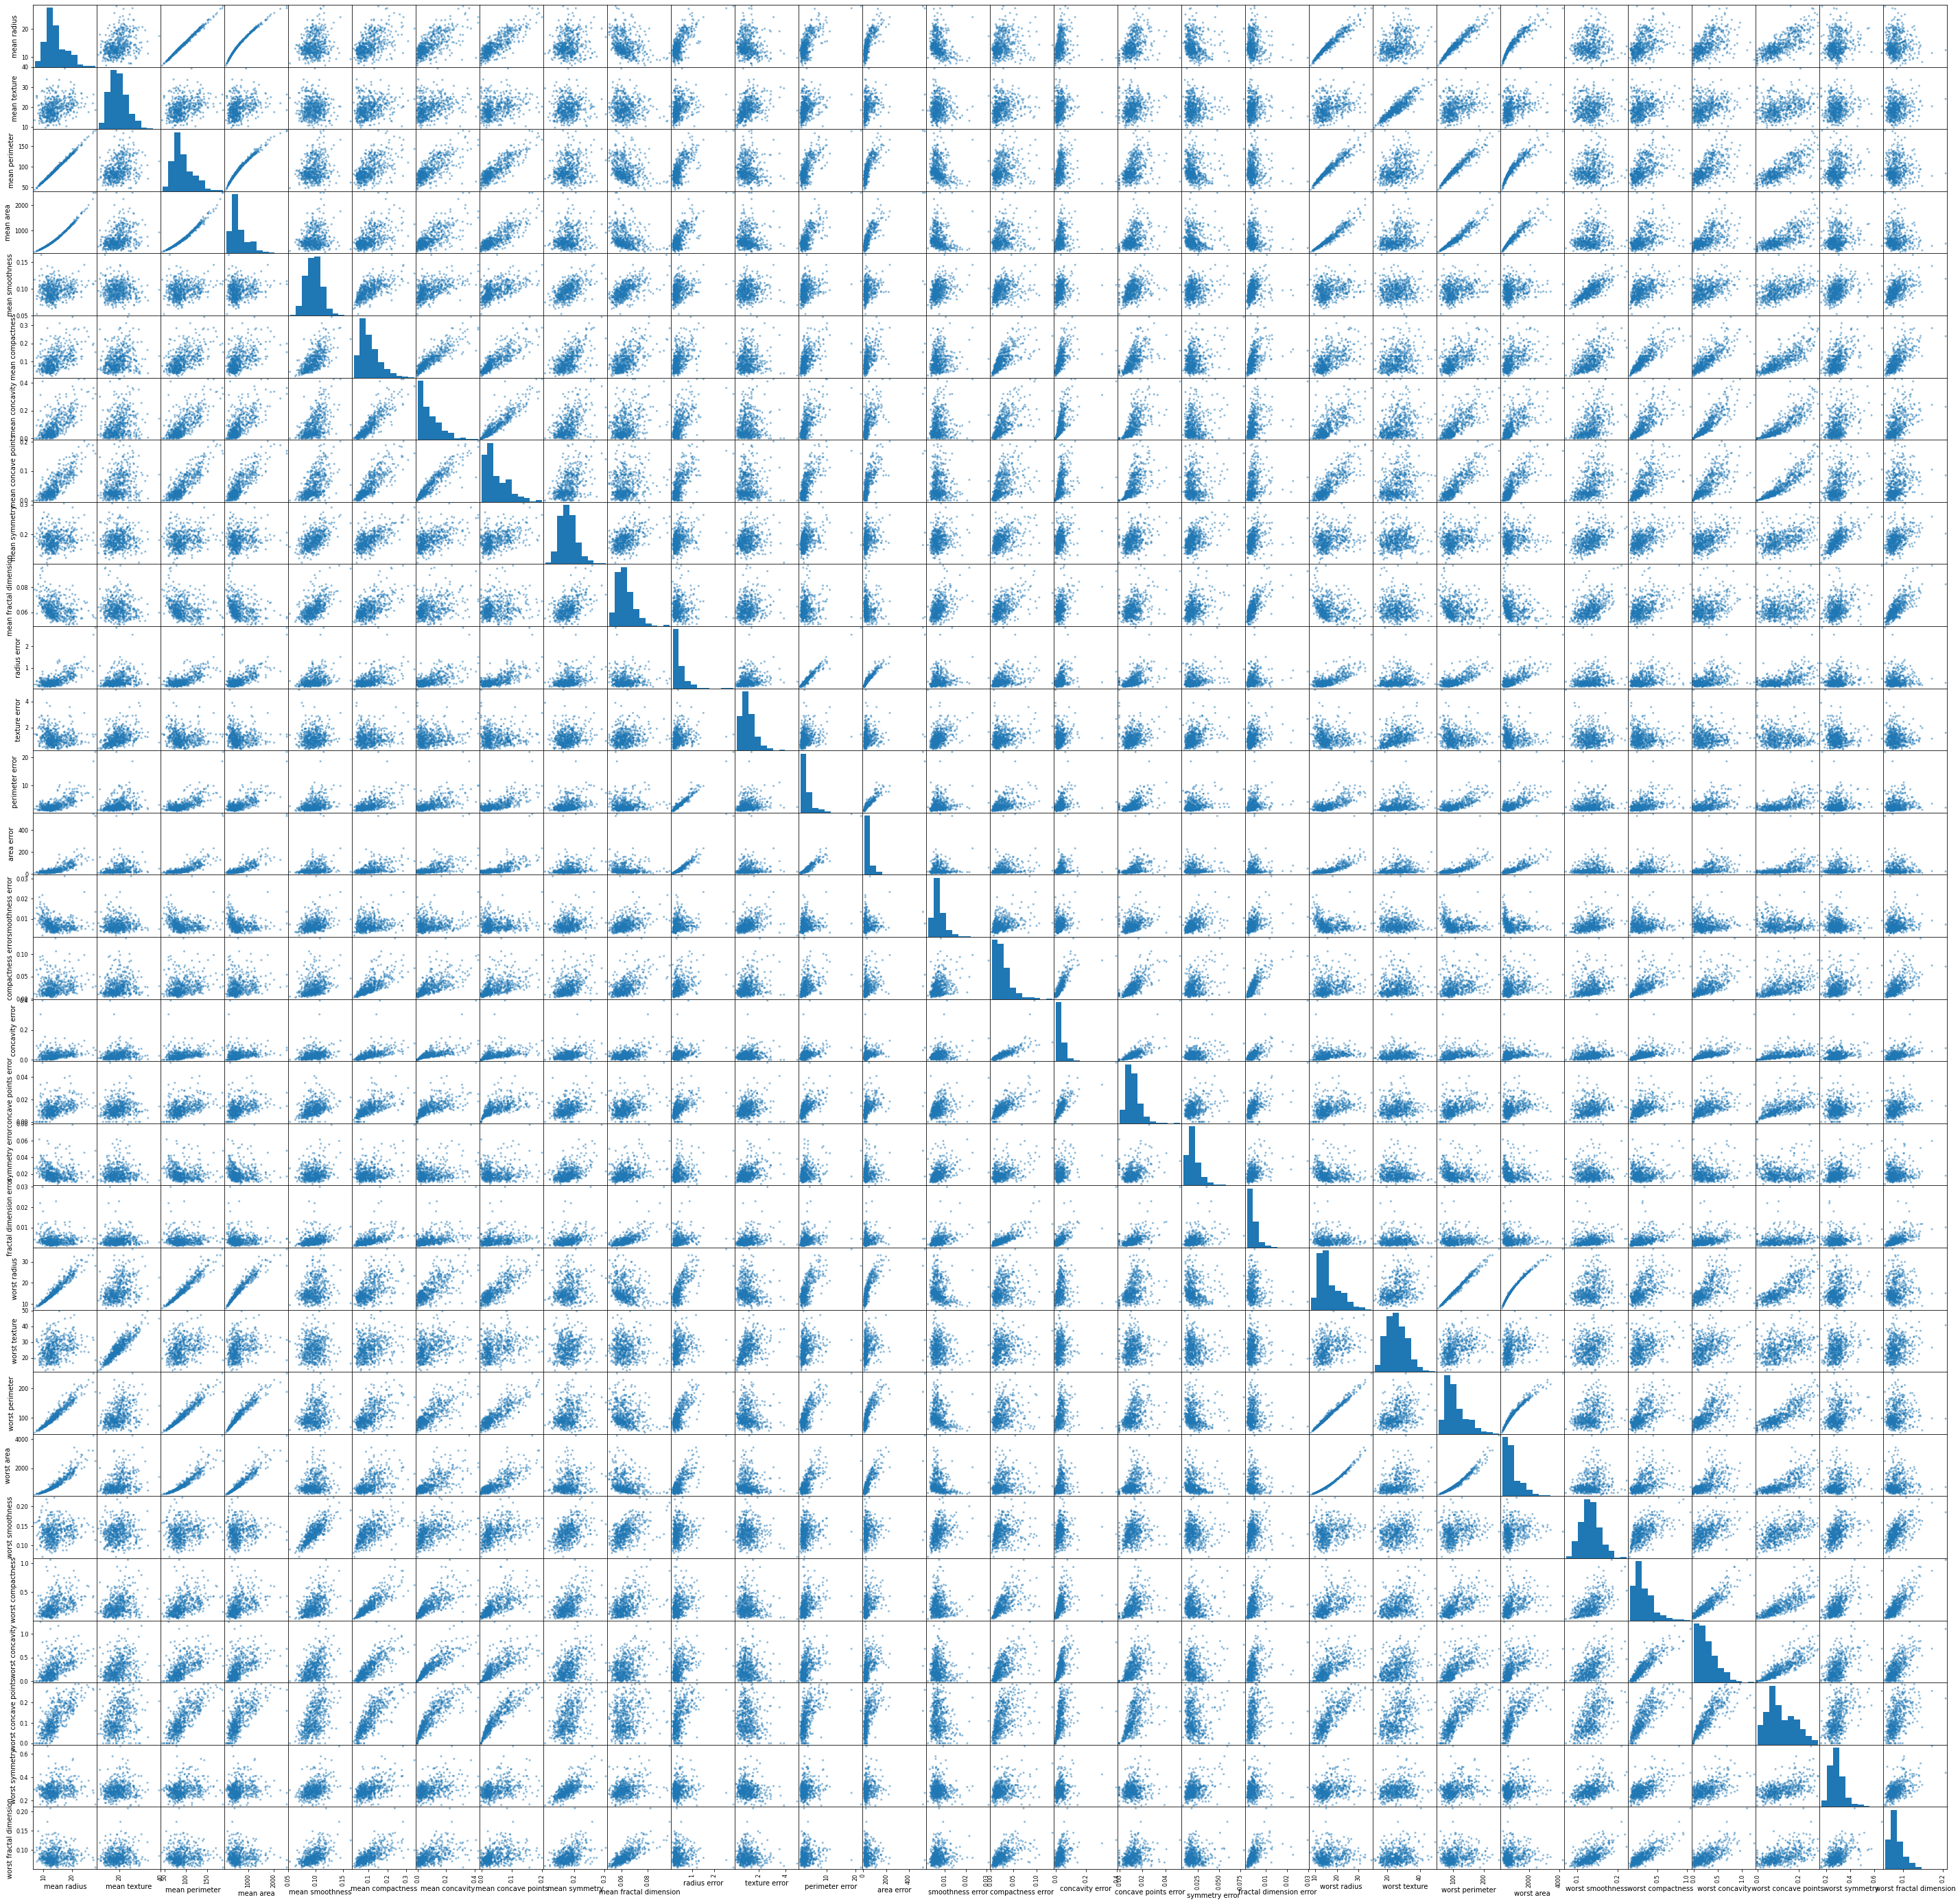

In [14]:
pd.plotting.scatter_matrix(breast_dataset_pd[breast_dataset.feature_names],figsize=(50,50))

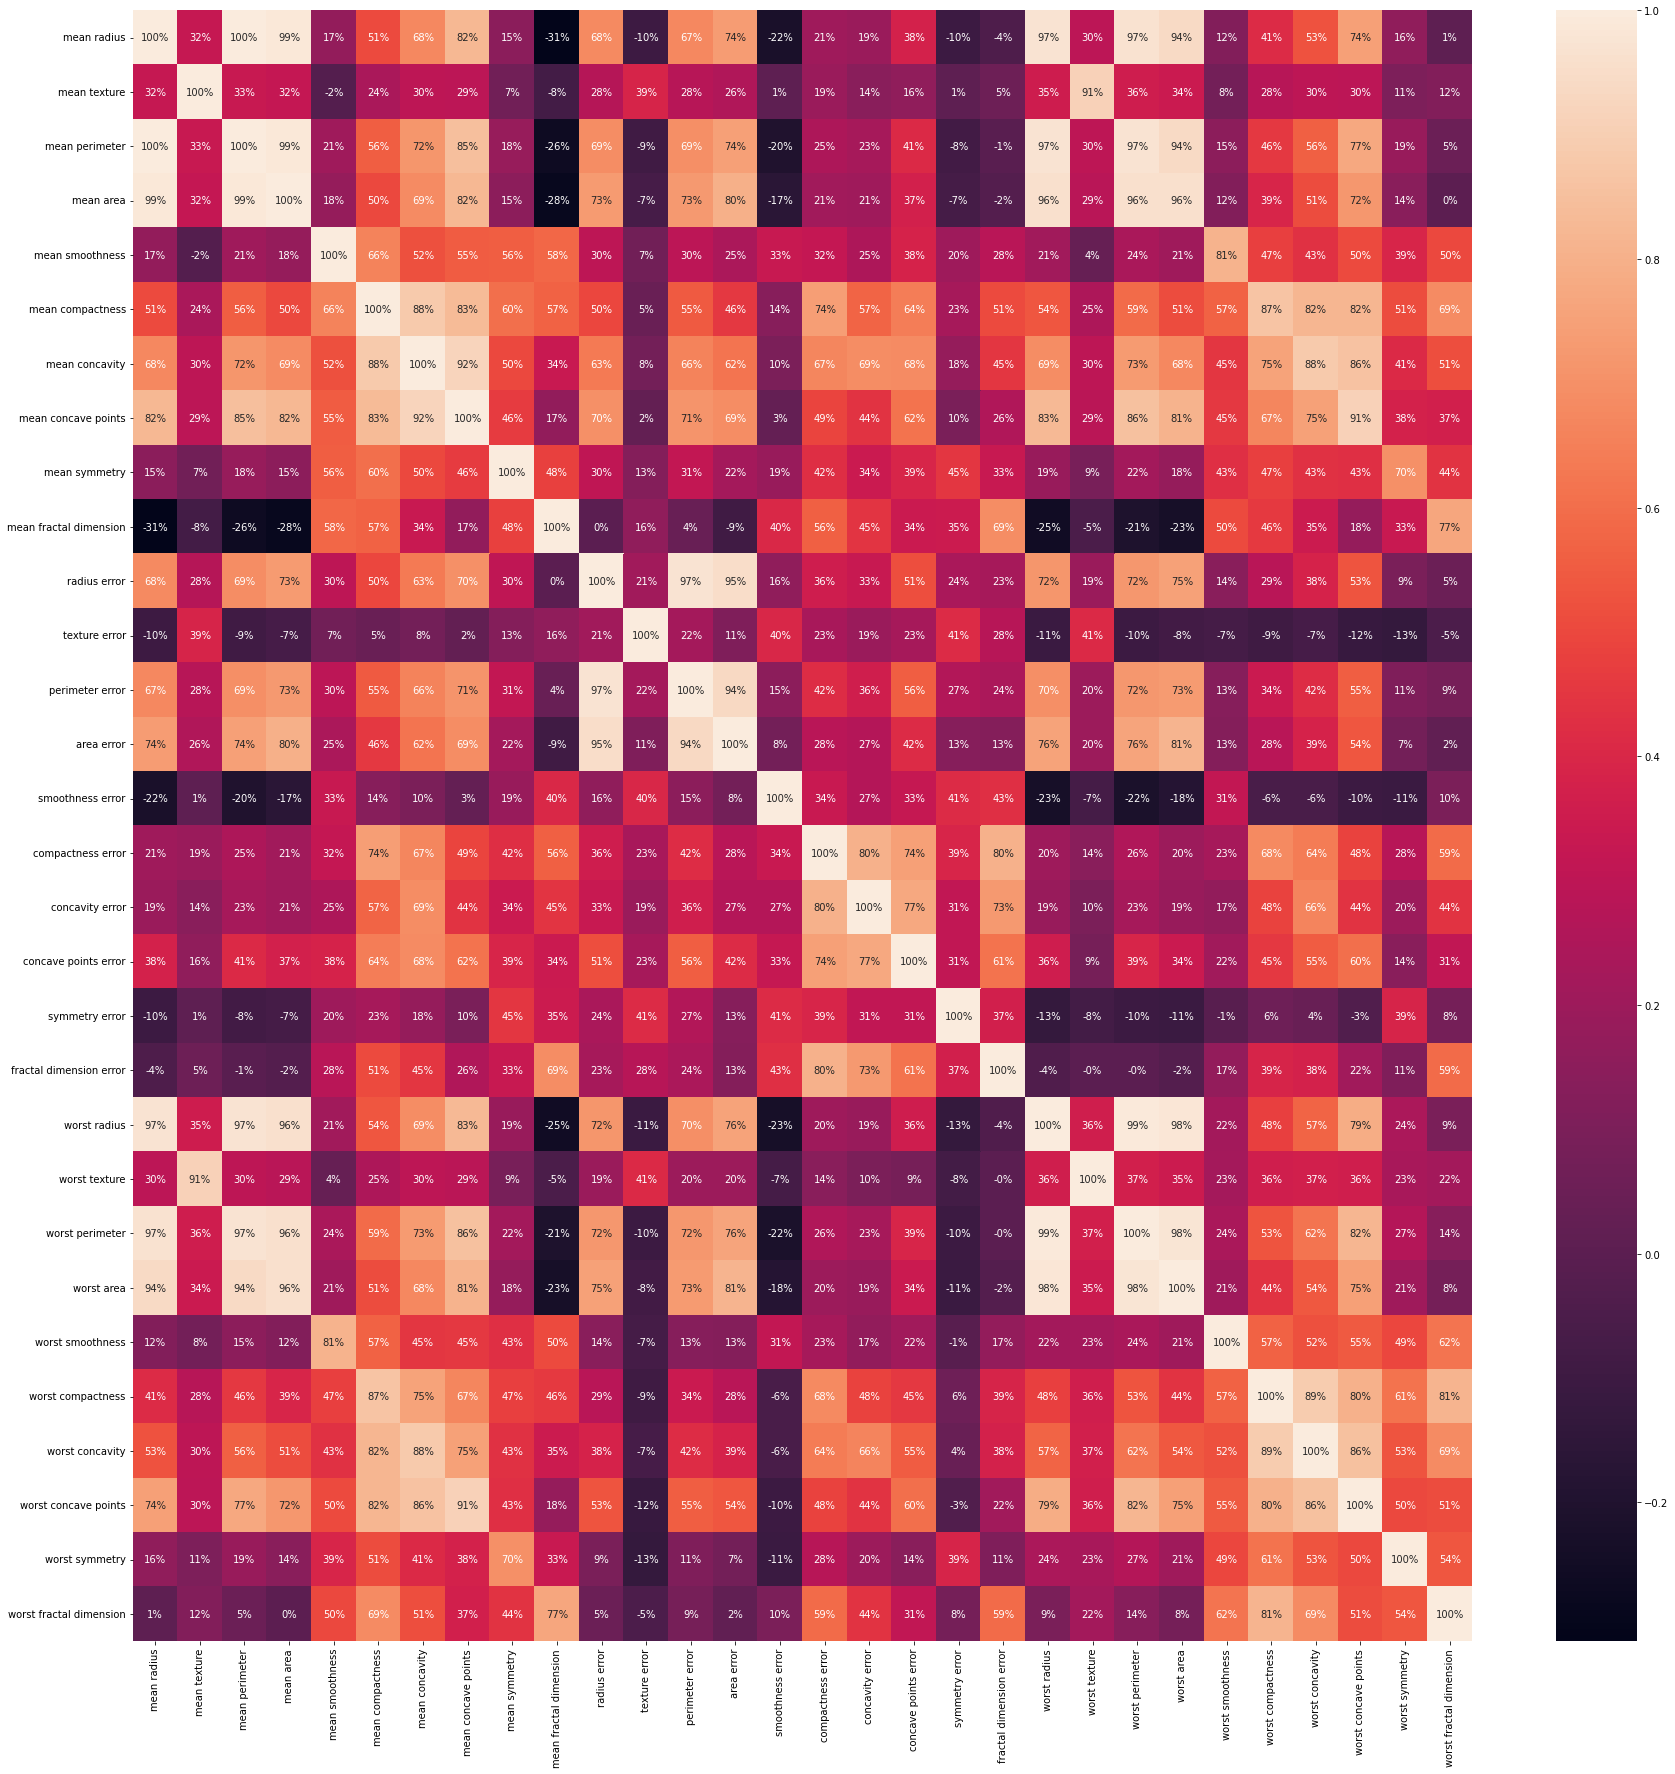

In [22]:
corr = breast_dataset_pd[breast_dataset.feature_names].corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,fmt='.0%')

In [16]:
breast_dataset_pd.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

>Number of empty values in each column(NaN, NAN, na)

In [17]:
breast_dataset_pd.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

>Count Malignant(0) and Benine(1) cases

In [18]:
breast_dataset_pd['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

>check the data types if any encoded is needed

In [19]:
breast_dataset_pd.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [21]:
#breast_dataset_pd.iloc[:,1].corr
breast_dataset_pd[breast_dataset.feature_names].corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

>Split datasets into dependent and independent sets

In [23]:
x = breast_dataset_pd.drop(['target'],axis=1).values
y = breast_dataset_pd['target'].values

In [25]:
type(y)

numpy.ndarray

In [26]:
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, stratify=breast_dataset.target,random_state=42)


>Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [28]:
def models(X_train,y_train):
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,y_train)

  #Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,y_train)

  #Random Forest Classfier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
  forest.fit(X_train,y_train)

  #Print the model accuracy 

  print('Logistic Regression traninig accuracy', log.score(X_train,y_train))
  print('Decision Tree traninig accuracy', tree.score(X_train,y_train))
  print('Random Forest traninig accuracy', forest.score(X_train,y_train))

  return log, tree, forest


In [29]:
model = models(X_train,y_train)

Logistic Regression traninig accuracy 0.9882629107981221
Decision Tree traninig accuracy 1.0
Random Forest traninig accuracy 1.0


> Test model accuracy


In [34]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):

  cm = confusion_matrix(y_test, model[i].predict(X_test))
  print('Model' ,i)

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print('Testing Accuracy =', (TP+TN)/(TP + TN+FN+FP))
  print()

Model 0
Testing Accuracy = 0.9790209790209791

Model 1
Testing Accuracy = 0.9440559440559441

Model 2
Testing Accuracy = 0.958041958041958



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len (model)):
  print('Mode ',i)
  print(classification_report(y_test, model[i].predict(X_test)))
  print(accuracy_score(y_test, model[i].predict(X_test)))

Mode  0
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791
Mode  1
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441
Mode  2
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg

In [40]:
from sklearn.neighbors import KNeighborsClassifier     #KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = knn.predict(X_test)

# Show prediction accuracy
print('\nPrediction accuracy:')
print('{:.2%}\n'.format(accuracy_score(y_test, scores)))


Prediction accuracy:
95.80%

